In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_excel('./titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


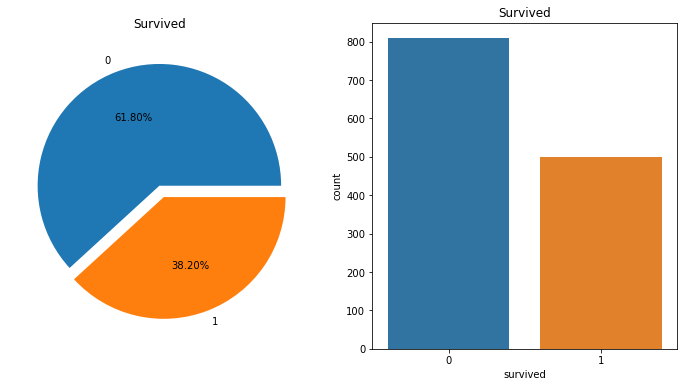

In [5]:
f, ax = plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<AxesSubplot:>

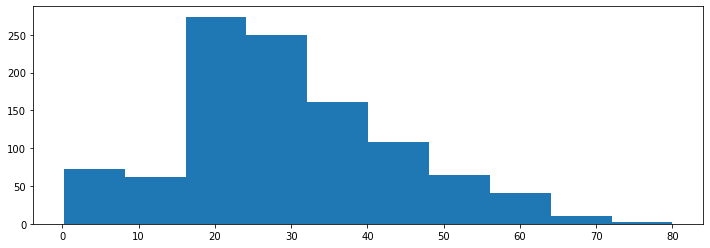

In [6]:
raw_data['age'].hist(bins=10,figsize=(12,4),grid=False)

In [7]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [8]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


<AxesSubplot:>

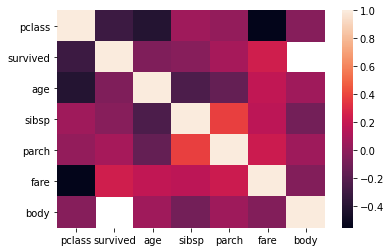

In [9]:
plt.figure()
sns.heatmap(raw_data.corr())

Text(0.5, 1.0, 'Correlation between features')

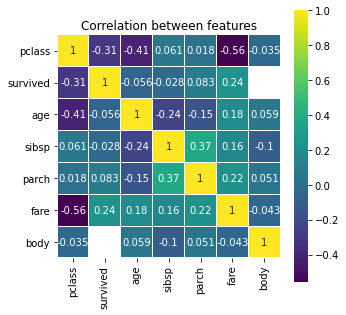

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(raw_data.corr(),linewidths=0.01,square=True,annot=True,cmap=plt.cm.viridis,linecolor='white')
plt.title('Correlation between features')

In [11]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0,3,7,15,30,60,100],
                             include_lowest=True,
                             labels=['baby','children','teenage',
                                    'young','adult','old'])
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,young
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,young


In [12]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

<AxesSubplot:xlabel='sex', ylabel='survived'>

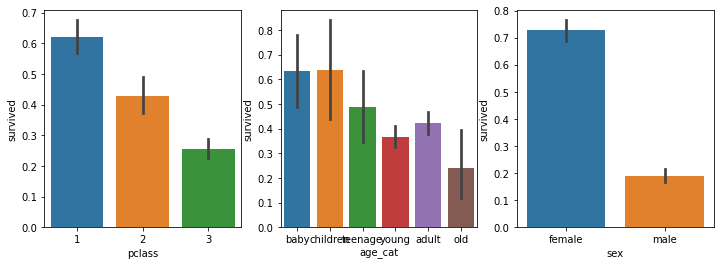

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot('pclass','survived',data=raw_data)
plt.subplot(132)
sns.barplot('age_cat','survived',data=raw_data)
plt.subplot(133)
sns.barplot('sex','survived',data=raw_data)
#plt.subplots_adjust(top=1,bottom=0.1,left=0.1,right=1,hspace=0.5,wspace=0.5)

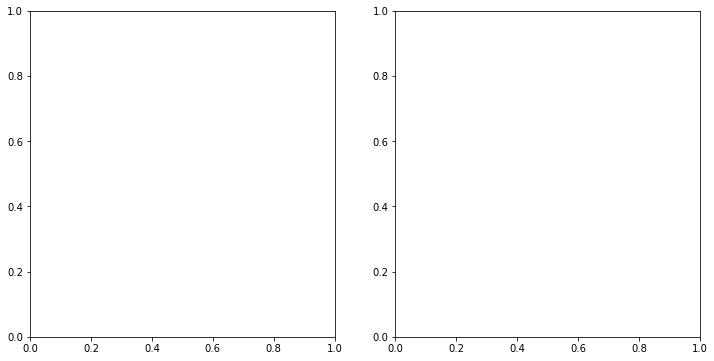

In [14]:
f,ax = plt.subplots(1,2,figsize=(12,6))

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex:Survived vs Dead')

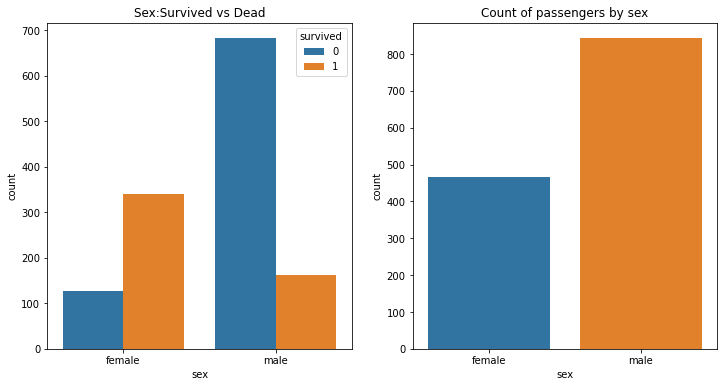

In [15]:
f,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data,ax=ax[1])
ax[1].set_title('Count of passengers by sex')

sns.countplot('sex',hue='survived',data=raw_data,ax=ax[0])
ax[0].set_title('Sex:Survived vs Dead')

In [16]:
#boat 정보가 있는 사람만 남기기
boat_survivors = raw_data[raw_data['boat'].notnull()]

In [17]:
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


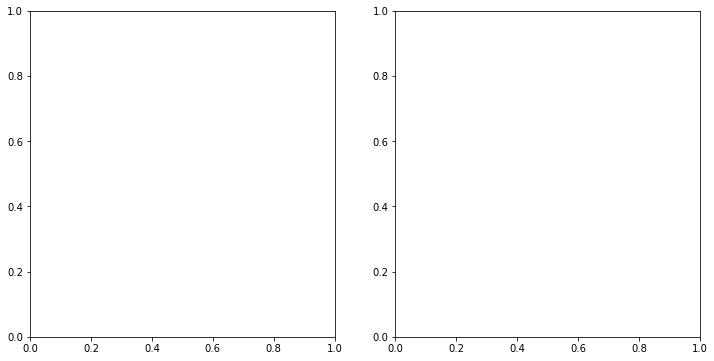

In [18]:
f, ax = plt.subplots(1,2,figsize=(12,6))

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived')

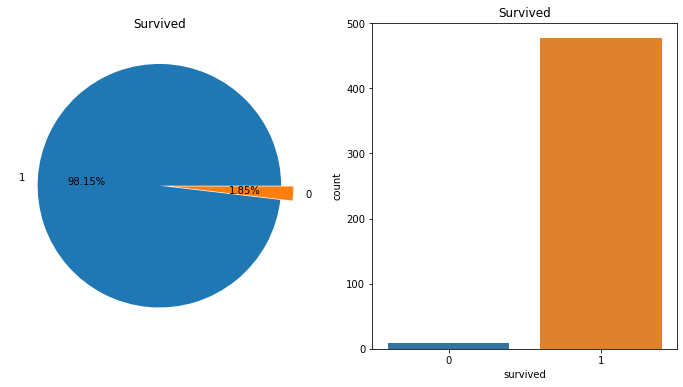

In [19]:
f, ax = plt.subplots(1,2,figsize=(12,6))
#survived 항목에 대해서 갯수를 새서 pie 차트를 그림
boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
                                                  autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')



In [20]:
#귀족들의 생존율
raw_data['name'][0]
# ,를 기준으로 분리하여 2번째 단어 
raw_data['name'][0].split(',')[1]
# .을 기준으로 추가로 분리하여 첫번째 단어, 그리고 strip으로 공백을 없애줌
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [21]:
#lambda 함수를 이용해서 함수를 생성 가능
test = lambda x: x**2
test(3)

9

In [22]:
list(map(test,range(5)))


[0, 1, 4, 9, 16]

In [23]:
conversion_rate = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rate)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [24]:
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [25]:
#crosstab 첫번째 칼럼을 index로, 두번째 칼럼의 수를 세어준다
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [26]:
raw_data['title']=raw_data['title'].replace('Mlle','Miss')
raw_data['title']=raw_data['title'].replace('Ms','Miss')
raw_data['title']=raw_data['title'].replace('Mme','Mrs')

Rare = ['Lady','the Countess','Countess','Capt','Master',
       'Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each,'Rare')
    
raw_data['title'].unique()


array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [27]:
print(raw_data[['title','survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


In [28]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [29]:
#female, male을 숫자로 변경
tmp =[]
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [30]:
raw_data['sex']= tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [31]:
tmp[0]= 'male'

In [32]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [33]:
#data형을 float으로 수정
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",0.0,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1305,3.0,0.0,"Zabour, Miss. Thamine",0.0,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",1.0,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,young,Mr
1307,3.0,0.0,"Zakarian, Mr. Ortin",1.0,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,young,Mr


In [34]:
#nan 데이터 삭제
temp = ['age','sibsp','parch','fare']
for each in temp:
    raw_data = raw_data[raw_data[each].notnull()]
    
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


In [35]:
#생존자 예측 모델 수립
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [36]:
# train_test_split : 데이터를 훈련용과 테스트용으로 구분
# test 사이즈는 10%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_pre,
                                                   raw_data[['survived']],test_size=0.1,
                                                   random_state=13)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [37]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [38]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [39]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [40]:
x_test

,pclass,sex,age,sibsp,parch,fare
699,3.0,1.0,38.0,0.0,0.0,8.6625
788,3.0,1.0,45.0,0.0,0.0,6.9750
1288,3.0,1.0,18.0,1.0,0.0,6.4958
803,3.0,1.0,26.0,0.0,0.0,7.8792
749,3.0,0.0,28.0,1.0,1.0,14.4000
...,...,...,...,...,...,...
221,1.0,1.0,65.0,0.0,1.0,61.9792
863,3.0,1.0,28.0,0.0,0.0,7.8958
892,3.0,1.0,31.0,0.0,0.0,7.7750
508,2.0,1.0,54.0,0.0,0.0,14.0000


In [41]:
raw_data[['survived']]

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1301,0.0
1304,0.0
1306,0.0
1307,0.0


In [42]:
raw_data['survived']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1301    0.0
1304    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1045, dtype: float64

In [43]:
import numpy as np
raw_data[['survived']]

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1301,0.0
1304,0.0
1306,0.0
1307,0.0


In [44]:
x_train = x_train.reset_index()

In [45]:
#index 번호를 0부터 다시 셋팅
x_train = x_train.reset_index()
x_train=x_train.drop(['index'],axis=1)
y_train = y_train.reset_index()
y_train=y_train.drop(['index'],axis=1)
x_test = x_test.reset_index()
x_test=x_test.drop(['index'],axis=1)
y_test = y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

In [46]:
y_train

,survived
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
935,1.0
936,0.0
937,1.0
938,0.0


In [47]:
#sklearn에서 DecisionTreeClassifier를 import하고 모델 수립
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(x_train,y_train)

print('Score:{}'.format(tree_clf.score(x_train,y_train)))

Score:0.8127659574468085


In [49]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='titanic.dot',
    feature_names=['pclass','sex','age','sibsp','parch','fare'],
    class_names=['Unsurvived','Survived'],
    rounded=True,
    filled=True)

import graphviz
with open('titanic.dot') as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='titanic_tree',directory='image/decision_trees',cleanup=True)
    dot

ValueError: Length of feature_names, 6 does not match number of features, 7

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(x_test)
print('Test Accuracy is ',accuracy_score(y_test, y_pred)*100)

In [ ]:
# 디카프리오와 윈슬렛은 살았을까?
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3, 1, 19, 0, 0, 5]
winslet = [1,0,17,1,1,100]

In [ ]:
#비생존, 생존 확률
tree_clf.predict_proba([winslet])

In [ ]:
tree_clf.predict_proba([dicaprio])

In [ ]:
def isSurvived(name,person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0]==0 else 'survived'
    print(name, 'is', isSurvive, ' --> ', max(tree_clf.predict_proba([person])[0])*100, '%')
    
isSurvived('Dicaprio',dicaprio)
isSurvived('Winslet',winslet)